# Importing Libraries


#**Testing on Iris Data Set**

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig

**After importing Data Sets we Standardize the data using(x-x.mean())/x.std() formula**
#**Standardize makes data to come close to each other because K_S test can be performed on same x points**
#**But for Data Points of petal length x points are differnt for versicolor and virginca**

In [2]:
iris=datasets.load_iris()
std=StandardScaler()
new_df=std.fit_transform(iris.data)
df=pd.DataFrame(new_df,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


**After Standardizing mean of setosa,versicolor and virginca comes close to each other and std deviaton also comes close to each other**
#**Now we can apply K_S test without any problem**

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


# Hypothesis 
#**My NuLL Hypothesis is that petal length of versicolor and virginca are of same distribution**
#**below code separates setosa,versicolor and virginca**

In [4]:
Iris_Setosa=df[df['target']==0]['petal length (cm)'].values
Iris_Versicolor=df[df['target']==1]['petal length (cm)'].values
Iris_Virginca=df[df['target']==2]['petal length (cm)'].values

**Histogam return the values of Data points according to bin**

In [5]:
counts1,bins1=np.histogram(Iris_Setosa,bins=10,density=True)
counts2,bins2=np.histogram(Iris_Versicolor,bins=10,density=True)
counts3,bins3=np.histogram(Iris_Virginca,bins=10,density=True)

# PDF of Setosa,Versicolor and Virginca

In [6]:
pdf_setosa=counts1/sum(counts1)
pdf_versicolor=counts2/sum(counts2)
pdf_virginca=counts3/sum(counts3)

# CDF of Setosa,Versicolor and Virginca

In [7]:
cdf_setosa=np.cumsum(pdf_setosa)
cdf_versicolor=np.cumsum(pdf_versicolor)
cdf_virginca=np.cumsum(pdf_virginca)

# Visualising Data

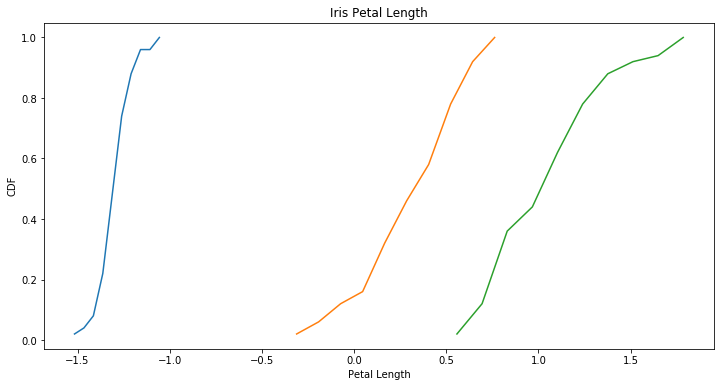

In [8]:
fig(figsize=(12,6))
plt.plot(bins1[1:],cdf_setosa)
plt.plot(bins2[1:],cdf_versicolor)
plt.plot(bins3[1:],cdf_virginca)
plt.xlabel('Petal Length')
plt.ylabel('CDF')
plt.title('Iris Petal Length')
plt.show()

**K_S test formual is sup(mod(cdf_1(x)-cdf_2(x))) where sup indicates supremum function(maximum) values**

In [9]:
K_S_test=(np.abs(cdf_versicolor-cdf_virginca)).max()

In [10]:
K_S_test

0.3200000000000001

**As per the K_S test formula we come to know weather to reject or accept a null hypothesis**

In [11]:
dict_alpha={10:1.22,5:1.36,2.5:1.48,1:1.63,0.5:1.73,0.1:1.95}
for i in dict_alpha.keys():
    c_alpha=dict_alpha[i]
    left_value=c_alpha*np.sqrt((Iris_Versicolor.shape[0]+Iris_Virginca.shape[0])/(Iris_Versicolor.shape[0]*Iris_Virginca.shape[0]))
    if K_S_test > left_value:
        print('for',i,'percent significant level Reject Null Hypothesis and Accept Alternative Hypothesis')
    else:
        print('Accept Null Hypothesis at Significance Level of',i,'percent')

for 10 percent significant level Reject Null Hypothesis and Accept Alternative Hypothesis
for 5 percent significant level Reject Null Hypothesis and Accept Alternative Hypothesis
for 2.5 percent significant level Reject Null Hypothesis and Accept Alternative Hypothesis
Accept Null Hypothesis at Significance Level of 1 percent
Accept Null Hypothesis at Significance Level of 0.5 percent
Accept Null Hypothesis at Significance Level of 0.1 percent


# K-S test using Scipy stats Lib

In [12]:
from scipy import stats

In [14]:
stats.kstest(Iris_Setosa,'norm')

KstestResult(statistic=0.8545248908789419, pvalue=3.358372468453955e-42)

# Observation
#**pvalue comes big anyway which is greater than 0.5 so it is Normal Gaussian Distribution**